# Aggregation & Grouping

There are several built-in aggregation functions that Numpy (and by extension, Pandas) has to offer us.  
`sum()`, `mean()`, `median()`, `min()` and `max()` can give us insights on a large dataset.  
Later in this notebook we will explore also the `groupby()` function that Pandas implemented for more sophisticated queries and insights.

In [1]:
import pandas as pd
import numpy as np

We will use the same function to visualize some tables

In [2]:
from IPython.display import display_html
def display_pds(*args):
    html_str=''
    for _df in args:
        html_str += _df.to_html()
    display_html(html_str.replace('table','table style="display:inline; margin:5px;"'),raw=True)

### Countries Dataset

We will load the Countries dataset (from Kaggle) and explore it

In [6]:
countries = pd.read_csv("../countries.csv")
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


Using the aggregation function lets see what is the highest, lowest population in the dataset:

In [11]:
countries['Population'].max()

1313973713

In [12]:
countries['Population'].min()

7026

we can also check the median, mean and sum of the population:

In [13]:
countries['Population'].sum()

6524044551

In [14]:
countries['Population'].median()

4786994.0

In [15]:
countries['Population'].mean()

28740284.365638766

Some of those aggregation built-in functions are included in another method, `describe()`, we used it before in the [Introduction section](https://github.com/TomerGoldfeder/data-science-notebooks/blob/main/pandas/pandas_introduction.ipynb)  
Before using the describe method we will check if there are any columns with NaN values:

In [18]:
countries.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                          True
Infant mortality (per 1000 births)     True
GDP ($ per capita)                     True
Literacy (%)                           True
Phones (per 1000)                      True
Arable (%)                             True
Crops (%)                              True
Other (%)                              True
Climate                                True
Birthrate                              True
Deathrate                              True
Agriculture                            True
Industry                               True
Service                                True
dtype: bool

We can see that we have some columns with NaN values, we will drop them before using the `describe()` method

In [24]:
countries.dropna().describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,1.790000e+02,1.790000e+02,179.000000
mean,3.421415e+07,5.641830e+05,9125.698324
std,1.317639e+08,1.395657e+06,9644.123141
min,1.347700e+04,2.800000e+01,500.000000
25%,1.188580e+06,1.991500e+04,1800.000000
50%,6.940432e+06,1.184800e+05,5100.000000
75%,2.086014e+07,4.964410e+05,12950.000000
max,1.313974e+09,9.631420e+06,37800.000000


The `describe()` method is giving us some first insights about the dataset like the GDP range spread from 500$ to 37800$ but the mean is only 9125$.

>There are some other built-in aggregation functions:
    <ul>
    <li>`count()` - total number of elements</li>
    <li>`sum()` - sum of elements</li>
    <li>`min()`, `max()` - minimum and maximum</li>
    <li>`mad()` - mean absolute deviation</li>
    <li>`prod()` - product of elements</li>
    <li>`first()`, `last()` - first and last elements</li>
    <li>`mean()`, `median()` - mean and median of the elements</li>
    <li>`std()`, `var()` - standart deviation and variance</li>
    </ul>

## GroupBy Aggregation

The `groupby()` aggregation got the name from the SQL language, but it has some hidden 'layers' under the hood.   
while the user does not notice it but the `groupby()` function can iterate over the data just once and updating the aggregation function that he called.  

The GroupBy does not returns a `DataFrame` object but a `DataFrameGroupBy` object which can handle more complex aggregations.

In [25]:
countries.groupby('Climate')

In [48]:
countries.groupby('Climate')['Population']

The `DataFrameGroupBy` object is kind of a 'view' (like in SQL) which he does not perform the aggregation until the function is called. That means the user can implement any aggregation function that he needs by using the `agg()` method of the object.

In [41]:
countries.groupby('Climate')['Population'].agg(lambda x: x.mean())

Climate
1      2.150973e+07
1,5    2.059263e+08
2      1.425539e+07
2,5    3.672341e+08
3      2.281059e+07
4      1.565195e+07
Name: Population, dtype: float64

Under the hood the `groupby()` method has 3 'steps':
<ol>
    <li>Split</li>
    <li>Apply</li>
    <li>Combine</li>
</ol>

The `groupby()` is spliting the data into the unique values of the column we selected, then apply the aggregation function that we want and finally it combine the results for each unique value into a dataframe.

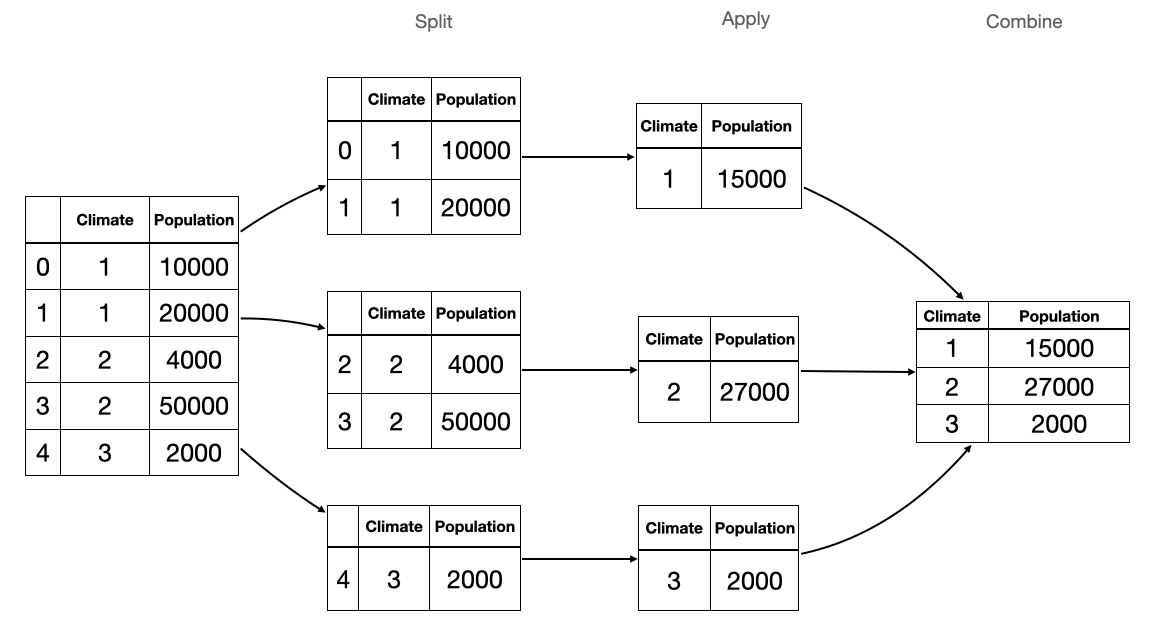

We can iterate over the `DataFrameGroupBy` object using a regular iteration loop, though it is much faster and easy to use the `apply()` built-in function.

In [47]:
for (met, group) in countries.groupby('Climate'):
    print("method: {0:4s}, shape: {1}".format(met, group.shape))

method: 1   , shape: (29, 20)
method: 1,5 , shape: (8, 20)
method: 2   , shape: (111, 20)
method: 2,5 , shape: (3, 20)
method: 3   , shape: (48, 20)
method: 4   , shape: (6, 20)


Another advantage of the `groupby()` method is the ability to apply the `describe()` on each of the groups.

In [49]:
countries.groupby('Climate')['Population'].describe()

,count,mean,std,min,25%,50%,75%,max
Climate,,,,,,,,
1,29.0,2.150973e+07,3.424947e+07,56361.0,2418393.00,7961619.0,2.701973e+07,1.658036e+08
"1,5",8.0,2.059263e+08,4.501784e+08,4786994.0,15252788.00,31505210.0,1.135521e+08,1.313974e+09
2,111.0,1.425539e+07,3.523835e+07,9439.0,185160.50,1641564.0,1.160942e+07,2.454527e+08
"2,5",3.0,3.672341e+08,6.305719e+08,1136334.0,3175116.00,5213898.0,5.502829e+08,1.095352e+09
3,48.0,2.281059e+07,4.789990e+07,65409.0,2414052.75,7454650.5,1.794448e+07,2.984442e+08
4,6.0,1.565195e+07,2.281710e+07,33987.0,3357023.00,7395993.5,1.399819e+07,6.087614e+07


This gives us the ability to draw more insigths on the data.  
for example in this dataset we can see that the majority of the countries has a type 2 Climate.

### Agg, Filter, Transform & Apply

We mentioned before that the `DataFrameGroupBy` object has the `agg()` method, in addition to this method the object has `filter()`, `transform()` and `apply()` methods for various operations

**Agg**  
When using the `agg()` method we can use more complex aggregation functions. previously we used it to calculate the mean of population of each climate group.  

we can extend the query by passing to the `agg()` method the functions that we want, lets see an example for multiple aggregation in one command:

In [56]:
countries.groupby('Climate').agg(['min', np.mean, max])

Population                           Area (sq. mi.)                \
               min          mean         max            min          mean   
Climate                                                                     
1            56361  2.150973e+07   165803560            665  9.765588e+05   
1,5        4786994  2.059263e+08  1313973713         121320  2.007061e+06   
2             9439  1.425539e+07   245452739             21  2.915636e+05   
2,5        1136334  3.672341e+08  1095351995          17363  1.167818e+06   
3            65409  2.281059e+07   298444215             78  4.128123e+05   
4            33987  1.565195e+07    60876136            160  5.921698e+05   

                 GDP ($ per capita)                         
             max                min          mean      max  
Climate                                                     
1        7686850              500.0   8150.000000  29000.0  
1,5      9596960              700.0   3237.500000   9000.0  
2        8511965              500.0   6526.126126  36000.0  
2,5      3287590             1600.0   3133.333333   4900.0  
3        9631420              600.0  16970.833333  37800.0  
4        2717300             3500.0  12433.333333  27600.0

Another way is to pass a dictionary of columns and what aggregation we want to perform on them:  
The dictionary can be also a list of aggregations that we want to check on a specific column.

In [58]:
countries.groupby('Climate').agg({
    "Population": [min, max],
    "Area (sq. mi.)": max,
    "GDP ($ per capita)": np.mean
})

Population             Area (sq. mi.) GDP ($ per capita)
               min         max            max               mean
Climate                                                         
1            56361   165803560        7686850        8150.000000
1,5        4786994  1313973713        9596960        3237.500000
2             9439   245452739        8511965        6526.126126
2,5        1136334  1095351995        3287590        3133.333333
3            65409   298444215        9631420       16970.833333
4            33987    60876136        2717300       12433.333333

**Filter**  
The `filter()` method allows us to drop data based on cretiria:

In [81]:
def filter_function(a):
    return a['Population'].std() > 6e8

countries.groupby('Climate').filter(filter_function)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"
112,Kyrgyzstan,C.W. OF IND. STATES,5213898,198500,"26,3","0,00","-2,45","35,64",1600.0,"97,0","84,0","7,3","0,35","92,35","2,5","22,8","7,08","0,353","0,208","0,439"
194,Swaziland,SUB-SAHARAN AFRICA,1136334,17363,"65,5","0,00",0,"69,27",4900.0,"81,6","30,8","10,35","0,7","88,95","2,5","27,41","29,74","0,119","0,515","0,366"


**Transform**  
In contrast to the `agg()` and `filter()` methods, which reduce our data so we can deduce insights, the `transform()` method is used to adjust our data for our needs, this means that the shape of the output will be the same as input shape.  

For example: in machine learning training we usually want to normalize the data, for that use we can use the `transform()` method. (in a second we will see that we can also use the `apply()` method for that)

In [137]:
countries.dropna().groupby('Climate')['Population'].transform(lambda x: x - x.mean())

0      7.966155e+06
1     -2.417326e+07
2      9.839249e+06
6     -1.627429e+07
7     -1.621866e+07
           ...     
218    9.442669e+06
219    6.811520e+07
224   -1.634654e+06
225   -4.785756e+06
226   -4.050961e+06
Name: Population, Length: 179, dtype: float64

**Apply**  
